# LASSO REGRESSION

LASSO stands for Least Absolute Shrinkage and Selection Operator.

We will implement Lasso Regression to the widely known data set Boston House Price to look into the properties of the regression method. We should standardize the scale for the assumption of Ridge Regression.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from sklearn.datasets import load_boston
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso

# Example 1

In [2]:
# helper function to calculate performance measure
def performance_measure(y_true,y_pred):
    
    mse=mean_squared_error(y_true,y_pred)
    r2=r2_score(y_true,y_pred)
   
    return mse,r2

The dataset is available in scikit-learn library.

In [3]:
# loading the dataset into a pandas dataframe.
house_price = load_boston()
df = pd.DataFrame(house_price.data, columns=house_price.feature_names)
df['PRICE'] = house_price.target
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.4 KB


In [5]:
# separating independent and dependent variables
x=df.drop('PRICE',axis=1)
y=df['PRICE']

In [6]:
# standardize the data
scaler=preprocessing.StandardScaler()
x_scaled=scaler.fit_transform(x)
y_scaled=scaler.fit_transform(y.values.reshape(-1,1))

We have scaled our data to make it more suitable for training the model. Now we will split the dataset into train and test set in the ratio 70:30

In [7]:
# train/test split
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y_scaled.flatten(), test_size=0.3, random_state=10)

In [8]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(354, 13)
(354,)
(152, 13)
(152,)


#  Linear Regression with OLS Method

In general the Linear regression follows OLS method to find the best fit. We are just mentioning it here to point out the difference between Linear and Ridge regression as they work along the same line but with a difference in their method.

In [9]:
# performing Linear Regression
ols_reg = LinearRegression()       # created an object of Linear Regression Class
ols_reg.fit(X_train, y_train)      # fitted the model in training data
ols_pred = ols_reg.predict(X_test) # made prediction using the model

# creating a dataframe to list the variables and their coefficients.
pd.DataFrame({'variable': house_price.feature_names, 'coefficient': ols_reg.coef_})

,variable,coefficient
0,CRIM,-0.143818
1,ZN,0.164870
2,INDUS,-0.018096
3,CHAS,0.044795
4,NOX,-0.192769
5,RM,0.256075
6,AGE,0.034665
7,DIS,-0.354445
8,RAD,0.286523
9,TAX,-0.224147


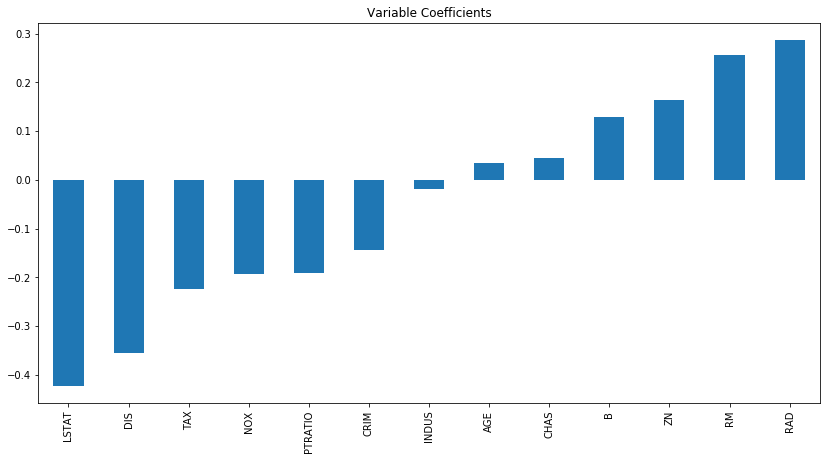

In [10]:
# Visualising the variable coefficients using a bar graph.
coef = pd.Series(ols_reg.coef_,house_price.feature_names).sort_values()
plt.figure(figsize=(14,7))
coef.plot(kind='bar', title='Variable Coefficients')
plt.show()

The bars that have more value in either direction contribute more to the prediction performance of the model.

In [11]:
# calculating performance measure of the model 
lin_mse,lin_r2=performance_measure(y_test,ols_pred)
print('Mean Squared Error :',lin_mse)
print('R^2 Score :',lin_r2)

Mean Squared Error : 0.3473910295367197
R^2 Score : 0.6996255772983112


In Lasso Regression choosing the value of alpha correctly is very important. We will first see the variable coefficient for different values of alpha in Lasso regression. We will visualise how the values of coefficients change with an increasing value of alpha and we will observe the fact that in Lasso regression the coefficients are made very small or exactly zero to reduce the complexity of the model.

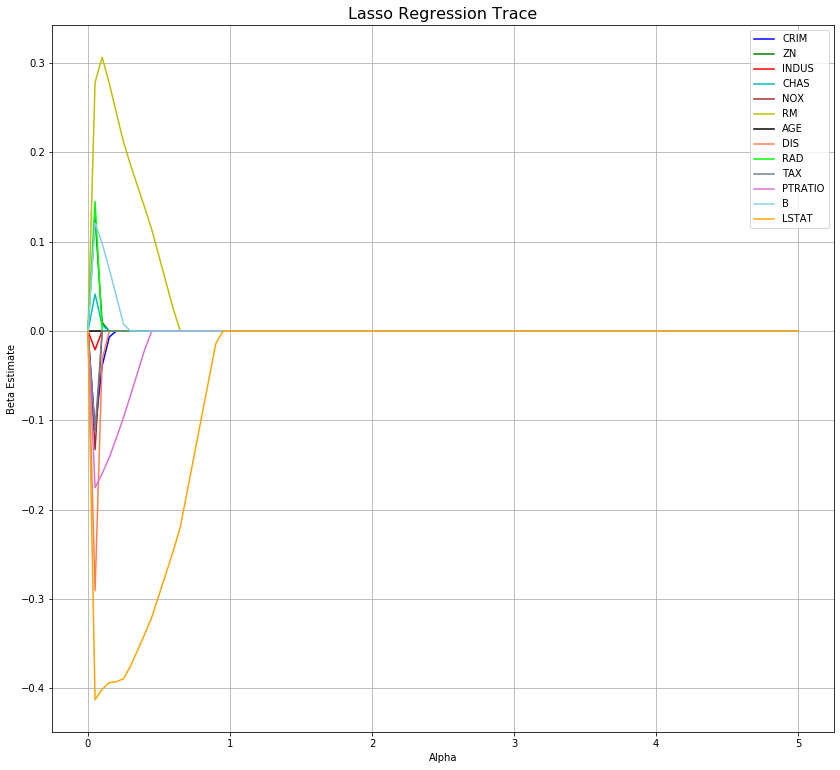

In [12]:
# creating an object of Lasso class and then performing Lasso regression for various values of alpha
lasso_reg = Lasso(alpha=1)
lasso_reg.fit(X_train, y_train)
lasso_df = pd.DataFrame({'variable': house_price.feature_names, 'estimate': lasso_reg.coef_})
lasso_train_pred = []
lasso_test_pred = []

alphas = np.arange(0.01, 4.01, 0.04)

for alpha in alphas:
    lasso_reg = Lasso(alpha=alpha)
    lasso_reg.fit(X_train, y_train)
    var_name = 'estimate' + str(alpha)
    lasso_df[var_name] = lasso_reg.coef_
    # prediction
    lasso_train_pred.append(lasso_reg.predict(X_train))
    lasso_test_pred.append(lasso_reg.predict(X_test))

lasso_df = lasso_df.set_index('variable').T.rename_axis('estimate').rename_axis(None, axis=1).reset_index()

fig, ax = plt.subplots(figsize=(14, 13))

ax.plot(lasso_df.CRIM,'b', lasso_df.ZN,'g', lasso_df.INDUS,'r', lasso_df.CHAS,'c', lasso_df.NOX,'brown', lasso_df.RM,'y', 
        lasso_df.AGE,'k', lasso_df.DIS,'coral', lasso_df.RAD,'lime', lasso_df.TAX,'slategray', lasso_df.PTRATIO,'orchid',
        lasso_df.B,'skyblue', lasso_df.LSTAT,'orange')

ax.set_xlabel("Alpha")
ax.set_xticklabels(np.arange(-1, 10, 1))
ax.set_ylabel("Beta Estimate")
ax.set_title("Lasso Regression Trace", fontsize=16)
ax.legend(labels=house_price.feature_names,loc='upper right')
ax.grid(True)

We can observe in the above graph that, unlike Ridge Regression, the $\beta$'s hit zero, which means some features get cast out after a certain point (feature selection). Recalling the equation, This is why Lasso Regression has an advantage in feature selection. If you would compare this graph with the one in Ridge Regression then you will notice that "Room" survives longer than others and "Tax" becomes null almost upon the iteration.

In [13]:
lasso_df

,estimate,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,estimate,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.0,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000
1,estimate0.01,-0.110512,0.127233,-0.020899,0.041368,-0.132694,0.278220,0.0,-0.290637,0.144976,-0.110928,-0.175352,0.121118,-0.412662
2,estimate0.05,-0.038915,0.009442,-0.000000,0.006329,-0.000000,0.306491,-0.0,-0.031939,-0.000000,-0.000000,-0.159509,0.098336,-0.401123
3,estimate0.09,-0.006659,0.000000,-0.000000,0.000000,-0.000000,0.277203,-0.0,-0.000000,-0.000000,-0.000000,-0.141661,0.069244,-0.393578
4,estimate0.13,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.244195,-0.0,-0.000000,-0.000000,-0.000000,-0.119765,0.038959,-0.392558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,estimate3.81,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.0,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000
97,estimate3.8499999999999996,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.0,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000
98,estimate3.8899999999999997,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.0,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000
99,estimate3.9299999999999997,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.0,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000


This dataframe contains values of coefficient of the features (independent variables) for different values of alpha ( i.e. from 0 to 5).

# R$^2$ Analysis

The r$^2$ score is a measure for analysing the performance of a model. When comparing two models, the higher the value, the better the performance.

(-0.1, 0.75)

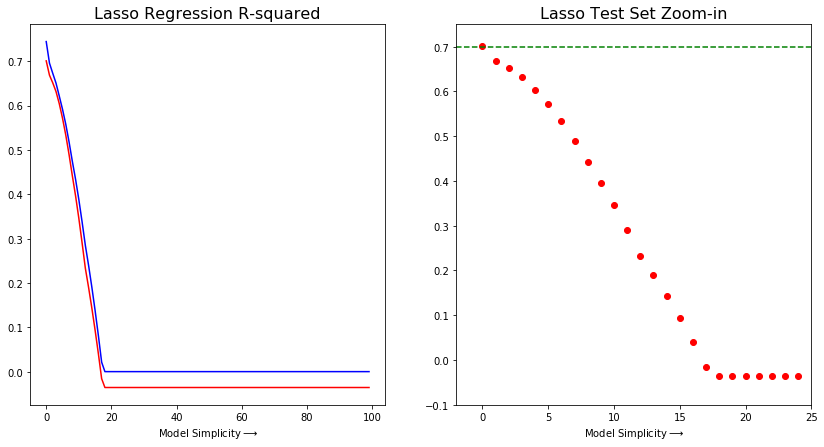

In [14]:
# R-squared of training set
lasso_r_squared_train = [performance_measure(y_train, p)[1] for p in lasso_train_pred]

# R-squared of test set
lasso_r_squared_test = [performance_measure(y_test, p)[1] for p in lasso_test_pred]

# plot R-squared of training and test
fig, axes = plt.subplots(1, 2, figsize=(14, 7))
plt.rcParams['axes.grid'] = True

# training set and test set together
axes[0].plot(lasso_r_squared_train, 'b', lasso_r_squared_test, 'r')
axes[0].set_title("Lasso Regression R-squared", fontsize=16)
axes[0].set_xlabel("Model Simplicity$\longrightarrow$")

# test set curve
axes[1].plot(lasso_r_squared_test[:25], 'ro')
axes[1].axhline(y=lin_r2, color='g', linestyle='--')
axes[1].set_title("Lasso Test Set Zoom-in", fontsize=16)
axes[1].set_xlabel("Model Simplicity$\longrightarrow$")
axes[1].set_xlim(-2,25,5)
axes[1].set_ylim(-0.1,0.75,0.05)

We see the R-squared of test set is located below the R-squared of training set. This is natural because the training set R-squared is calculated based on itself while the test set R-squared is based on the model made from training set.

Another point is that the training set R-squared constantly declines as the model gets simpler. Understanding it reversely, we know that training set R-squared should increase as we add more variables, which is called overfitting. From the right plot, however, it seems like the test set R-squared improves as the model becomes simpler. Recalling the definition of overfitting, a simpler model is good for new observations, the test set here.

# MSE Analysis

The Mean Absolute Error (MSE) is a measure for analysing the performance of a model. When comparing two models, the lower the value, the better the performance.

Text(0.5, 0, 'Model Simplicity$\\longrightarrow$')

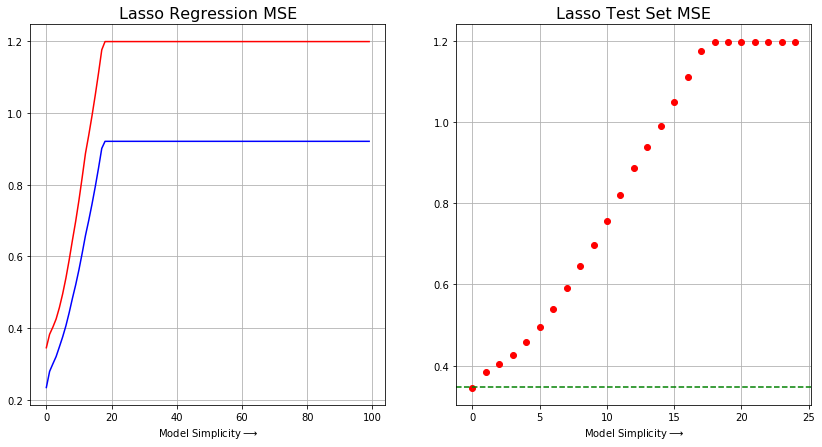

In [15]:
# MSE of training set
lasso_mse_train = [performance_measure(y_train, p)[0] for p in lasso_train_pred]

# MSE of test set
lasso_mse_test = [performance_measure(y_test, p)[0] for p in lasso_test_pred]

# plot MSE of training and test
fig, axes = plt.subplots(1, 2, figsize=(14, 7))
plt.rcParams['axes.grid'] = True

axes[0].plot(lasso_mse_train, 'b', lasso_mse_test, 'r')
axes[0].set_title("Lasso Regression MSE", fontsize=16)
axes[0].set_xlabel("Model Simplicity$\longrightarrow$")

# test set curve
axes[1].plot(lasso_mse_test[:25], 'ro')
axes[1].axhline(y=lin_mse, color='g', linestyle='--')
axes[1].set_title("Lasso Test Set MSE", fontsize=16)
axes[1].set_xlabel("Model Simplicity$\longrightarrow$")

These plots can be explained in the same way of the R-squared plots, but in the opposite direction. MSE is one of the indicators to measure errors. We can see that the test set MSE has the lowest point approximately around the point (0,0.35). 


Next, we will find the alpha value (or lambda) for this type of lowest point. Note that the lalpha to be found won't be corresponding to the exact point on the plot above, as we are not trying for a test set specific alpha, we will run a general search for such a value of aplha in a given range that will correspond to the least value of mse and a higher value of r^2 score.


For conducting this type of search we will use the GridSearch class available in scikit-learn. Please refer to the documentation link provided  to know more about it: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html?highlight=gridsearchcv#sklearn.model_selection.GridSearchCV


In addition, there are other libraries called RidgeCV and LassoCV. They basically do the same job to loop through values and find the optimal value as done by GridSearchCV but with slightly different mechanism.

In [16]:
# For comparison we will display the performance measure of Linear Regression here
print('Mean Squared Error :',round(lin_mse,4))
print('R^2 Score :',round(lin_r2,4))

Mean Squared Error : 0.3474
R^2 Score : 0.6996


In [17]:
param = {'alpha': np.arange(0.01, 10, 0.01)}

lasso_reg = GridSearchCV(Lasso(), param)
lasso_reg.fit(X_train, y_train)
lasso_pred = lasso_reg.predict(X_test)

print(lasso_reg.best_estimator_)
print("\nR-Squared:", round(r2_score(y_test, lasso_pred), 4))
print("MSE:", round(mean_squared_error(y_test, lasso_pred), 4))

Lasso(alpha=0.01)

R-Squared: 0.7008
MSE: 0.346


We can observe that the performance of the lasso regression model is slightly better than the performance of linear regression as the MSE has declined a bit and the r^2 score has increased slightly. This change can be more dramatic on some different data set. Try out the comparison on a number of datasets to understand the difference more clearly.

In [18]:
# Performing lasso regression with alpha=0.01
lasso_reg2 = Lasso(alpha=0.01)
lasso_reg2.fit(X_train, y_train)
y_pred=lasso_reg2.predict(X_test)

lasso_mse,lasso_r2=performance_measure(y_test,y_pred)
print('Mean Squared Error :',round(lasso_mse,4))
print('R^2 Score :',round(lasso_r2,4))

Mean Squared Error : 0.346
R^2 Score : 0.7008


In [19]:
# creating a dataframe to display the variables along with their coefficients 
pd.DataFrame({'variable': house_price.feature_names, 'coefficient': lasso_reg2.coef_})

,variable,coefficient
0,CRIM,-0.110512
1,ZN,0.127233
2,INDUS,-0.020899
3,CHAS,0.041368
4,NOX,-0.132694
5,RM,0.278220
6,AGE,0.000000
7,DIS,-0.290637
8,RAD,0.144976
9,TAX,-0.110928


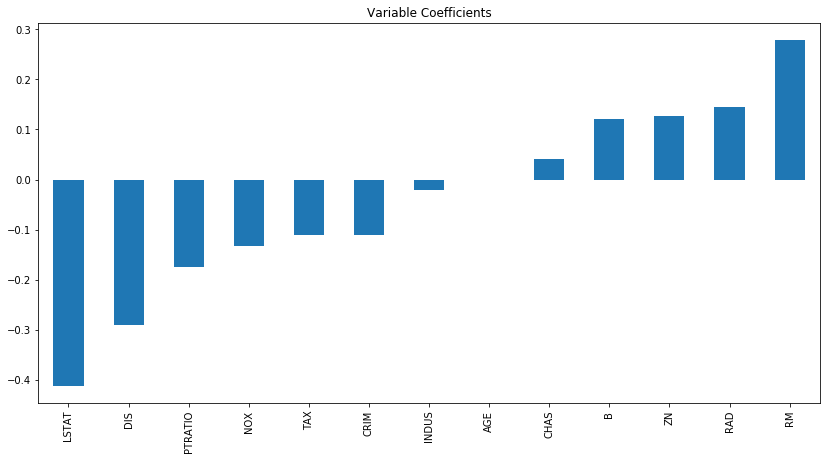

In [20]:
# Visualising the variable coefficients using a bar graph.
plt.rcParams['axes.grid'] = False
coef = pd.Series(lasso_reg2.coef_,house_price.feature_names).sort_values()
plt.figure(figsize=(14,7))
coef.plot(kind='bar', title='Variable Coefficients')
plt.show()

We can see that the coefficient of the variable 'AGE' has gone zero i.e. this feature has been dropped.

# Example 2
​
**Hand's on time!**
​

The dataset has been downloaded and converted into a pandas data frame. Follow the instructions and fill in the missing lines of code to get the results.

In [21]:
# A helper function for downloading files using url
import requests
import os
def download(url, local_filename=None):
    """
    Downloads the file in the ``url`` and saves it in the current working directory.
    """
    data = requests.get(url)
    if local_filename is None:
        local_filename = os.path.basename(url)
    with open(local_filename, 'wb') as fd:
        fd.write(data.content)

In [22]:
# download data
url='https://gist.githubusercontent.com/seankross/a412dfbd88b3db70b74b/raw/5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1/mtcars.csv'
download(url)

# loading the data into a pandas dataframe
data_df= pd.read_csv('mtcars.csv',index_col='model')
data_df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [23]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, Mazda RX4 to Volvo 142E
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     32 non-null     float64
 1   cyl     32 non-null     int64  
 2   disp    32 non-null     float64
 3   hp      32 non-null     int64  
 4   drat    32 non-null     float64
 5   wt      32 non-null     float64
 6   qsec    32 non-null     float64
 7   vs      32 non-null     int64  
 8   am      32 non-null     int64  
 9   gear    32 non-null     int64  
 10  carb    32 non-null     int64  
dtypes: float64(5), int64(6)
memory usage: 2.9+ KB


Separate the feature set and target.


**The feature should consist of all columns except the column 'mpg'.**


**The target column is 'mpg'.**

In [ ]:
# separating the independent and dependent variables
x=<<'your code here'>>
y=<<'your code here'>>

In [ ]:
# standardize the data
scaler=preprocessing.StandardScaler()
x_scaled=scaler.fit_transform(x)
y_scaled=scaler.fit_transform(y<<'your code here'>>) # you need to reshape the variable y for it to be suitable for tansformation

**Split the dataset into train and test in the ratio 70:30.**

In [ ]:
# train/test split
x_train, x_test, y_train, y_test = train_test_split(<<'your code here'>>, y_scaled.flatten(), test_size=<<'your code here'>>, random_state=10)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

The result of the above cell should be the following:
    
    
    (22, 10)       
    (22,)        
    (10, 10)       
    (10,)

# Linear Regression 

In [ ]:
# create an object of LinearRegression class
lin_reg=LinearRegression()
# fit the model on training data
lin_reg.fit(x_train,y_train)
# predict y_test using the trained model
y_pred=lin_reg.predict(<<'your code here'>>)


# calculate mse and r2 score
lin2_mse,lin2_r2=performance_measure(y_test,<<'your code here'>>)
print('Mean Squared Error :',round(lin2_mse,4))
print('R^2 Score :',round(lin2_r2,4))

The expected output from the above cell should  be:
    
    
Mean Squared Error : 0.52


R^2 Score : -0.8419


**Note: The value of the output may vary slightly due to running the code on a different system but that's okay.**

Also, the negative value of the r^2 score suggests that the model has a very poor fit.

In [ ]:
# Visualising the variable coefficients using a bar graph.
col=['cyl','disp','hp','drat','wt','qsec','vs','am','gear','carb']
coef = pd.Series(lin_reg.coef_,col).sort_values()
plt.figure(figsize=(14,7))
coef.plot(kind='bar', title='Variable Coefficients')
plt.show()

# Lasso Regression

In [ ]:
# creating an object of Lasso class and then performing Lasso regression for various values of alpha
lasso_reg2 = Lasso(alpha=1)
lasso_reg2.fit(x_train, y_train)
lasso_df2 = pd.DataFrame({'variable': ['cyl','disp','hp','drat','wt','qsec','vs','am','gear','carb'] , 'estimate': lasso_reg2.coef_})
lasso_train_pred2 = []
lasso_test_pred2 = []

alphas = np.arange(0.01, 4.01, 0.04)

for alpha in alphas:
    lasso_reg = Lasso(alpha=alpha)
    lasso_reg.fit(x_train, y_train)
    var_name = 'estimate' + str(alpha)
    lasso_df2[var_name] = lasso_reg.coef_
    # prediction
    lasso_train_pred2.append(lasso_reg.predict(x_train))
    lasso_test_pred2.append(lasso_reg.predict(x_test))

lasso_df2 = lasso_df2.set_index('variable').T.rename_axis('estimate').rename_axis(None, axis=1).reset_index()

fig, ax = plt.subplots(figsize=(14, 13))

ax.plot(lasso_df2.cyl,'b', lasso_df2.disp,'g', lasso_df2.hp,'r', lasso_df2.drat,'c', lasso_df2.wt,'brown', lasso_df2.qsec,'y', 
        lasso_df2.vs,'k', lasso_df2.am,'coral', lasso_df2.gear,'lime', lasso_df2.carb,'slategray')
ax.set_xlabel("Alpha")
ax.set_xticklabels(np.arange(-1, 10, 1))
ax.set_ylabel("Beta Estimate")
ax.set_title("Lasso Regression Trace", fontsize=16)
ax.legend(labels=['cyl','disp','hp','drat','wt','qsec','vs','am','gear','carb'] ,loc='upper right')
ax.grid(True)

In [ ]:
param = {'alpha': np.arange(0.01, 10, 0.01)}

lasso_reg2 = GridSearchCV(Lasso(), param)
lasso_reg2.fit(x_train, y_train)
lasso_pred = lasso_reg2.predict(x_test)

print(lasso_reg2.best_estimator_)
print("\nR-Squared:", round(r2_score(y_test, lasso_pred), 4))
print("MSE:", round(mean_squared_error(y_test, lasso_pred), 4))

In [ ]:
# Performing lasso regression with alpha obtained in the previous cell
lasso_reg2 = Lasso(alpha=<<'your code here'>>)
lasso_reg2.fit(x_train, y_train)
y_pred=lasso_reg2.predict(x_test)

lasso_mse,lasso_r2=performance_measure(y_test,y_pred)
print('Mean Squared Error :',round(<<'your code here'>>,4))
print('R^2 Score :',round(lasso_r2,4))

In [ ]:
# creating a dataframe to display the variables along with their coefficients 
pd.DataFrame({'variable':['cyl','disp','hp','drat','wt','qsec','vs','am','gear','carb']  , 'coefficient': lasso_reg2.coef_})

In [ ]:
# Visualising the variable coefficients using a bar graph.
col=['cyl','disp','hp','drat','wt','qsec','vs','am','gear','carb']
coef = pd.Series(lasso_reg2.coef_,col).sort_values()
plt.figure(figsize=(14,7))
coef.plot(kind='bar', title='Variable Coefficients')
plt.show()

You can see that this time for this dataset their is a more prominent difference in the results of the two regression techniques. Here, 4 out of 10 features have been dropped to reduce the complexity of the model.You can see that this time for this dataset there is a more prominent difference in the results of the two regression techniques.